# EZ: Plotting example runs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob as glob
import h5py
import sys
sys.path.append('../')
import model as ez

In [2]:
plt.rcParams.update({'font.size': 20})
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["font.serif"] = "Times New Roman"

## Load data

In [23]:
# Choose input directory
# idir = '../example_run_dir_q/'
idir = '../example_run_dir_q_parallel/'

# Choose output directory
odir = './'

In [24]:
# Searches through all directories in 'Data' folder (which are named after experiments) and imports the data:
dirs = sorted(glob.glob(idir+'q*'))

runs = []
for file in dirs:
    run = file.split('/')[2]
    runs.append(run)

# Sort run-names based on value of q_in
runs = sorted(runs, key=lambda x: float(x.split('_')[2].replace('d','.')), reverse=False)

print(runs)

['q_in_20', 'q_in_30', 'q_in_40', 'q_in_50', 'q_in_60', 'q_in_70', 'q_in_80', 'q_in_90', 'q_in_100']


In [25]:
qins = [float(x.split('_')[2].replace('d','.')) for x in runs]
print('N_in = %s' % qins)

N_in = [20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0]


Let's see what is in our imported variables.

We saved the data in what's called a 'dictionary', which names its variables with strings. To see the experiments do the following:

In [26]:
for run in runs[:1]:
    fname = str(glob.glob(idir+run+'/*_scalars.h5')[0])
    with h5py.File(fname,'r') as f:
        print(run)
        for subdat in f:
            print(subdat)
            print(f[subdat].keys())

q_in_20
parameters
<KeysViewHDF5 ['Nx', 'Ny', 'bed_h', 'c_0', 'f', 'fb', 'initial', 'mask_index', 'q_in', 'skipmax', 'slope', 'zfactor']>
scalars
<KeysViewHDF5 ['bed_activity', 'e_last', 'e_mid', 'q_mid', 'q_out', 'tstep']>


# Snapshots
Just plotting every other run

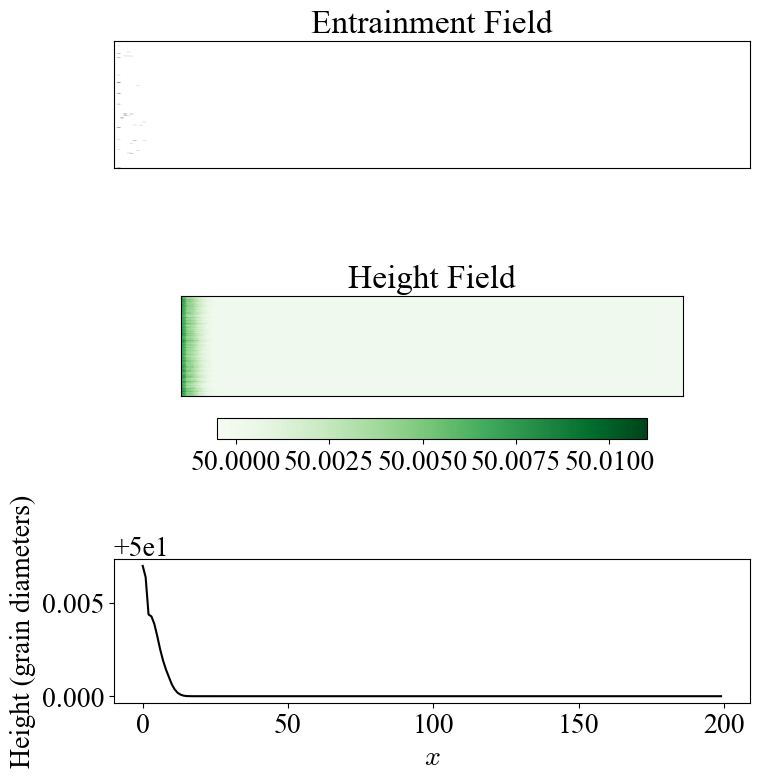

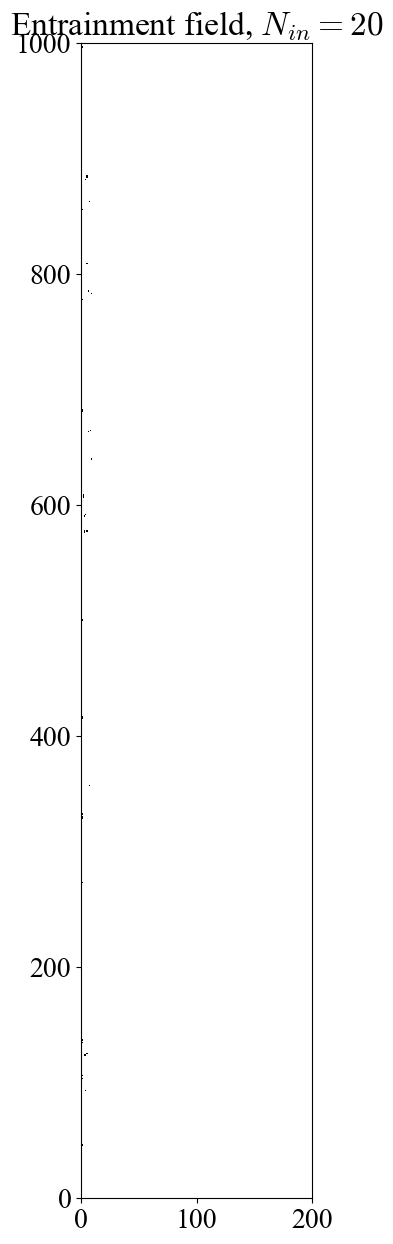

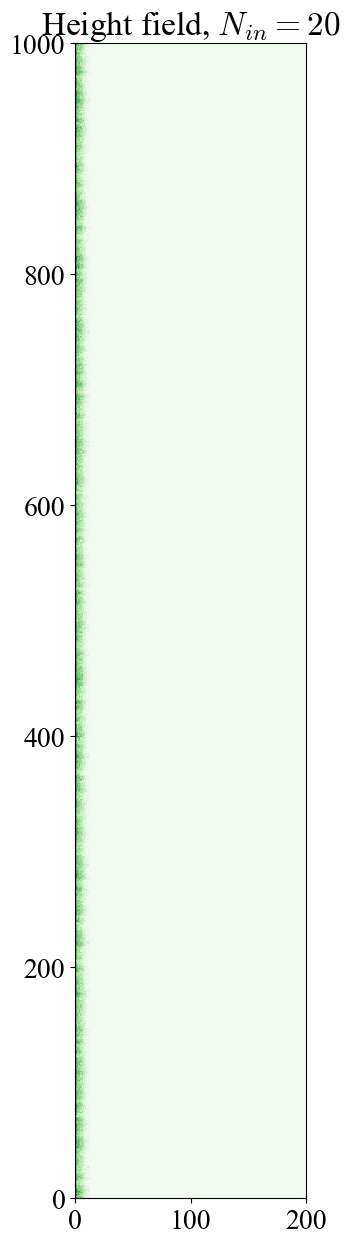

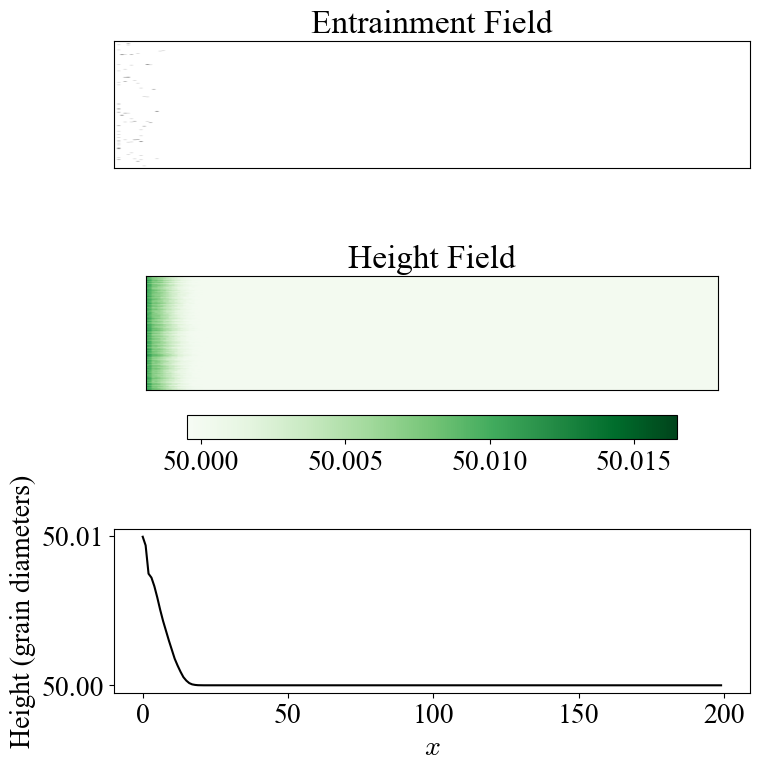

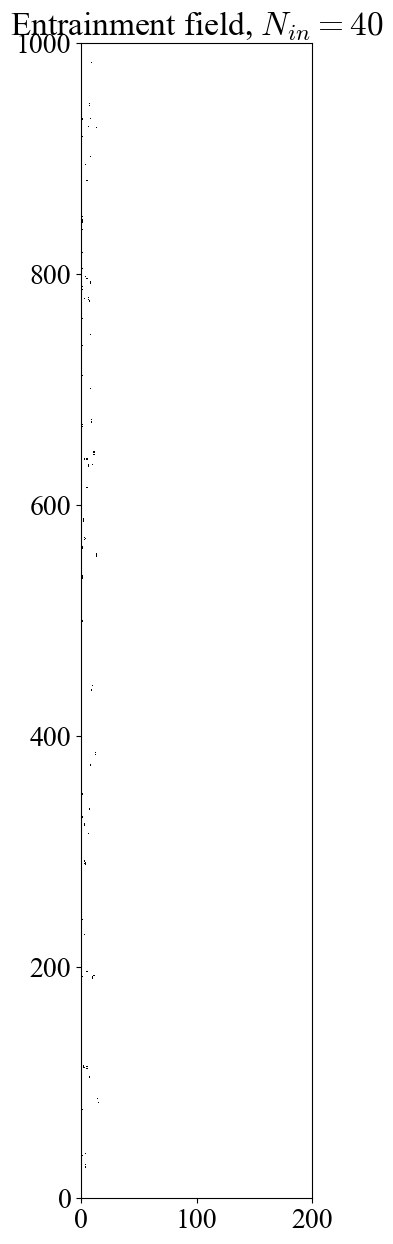

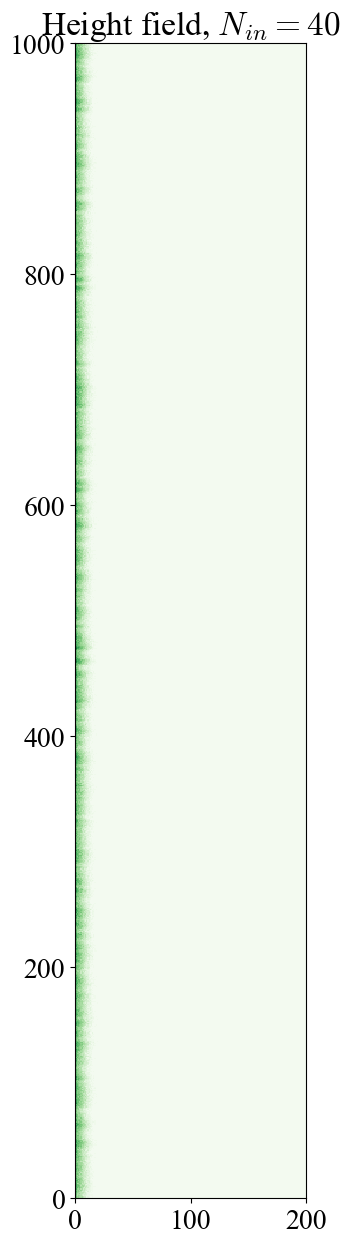

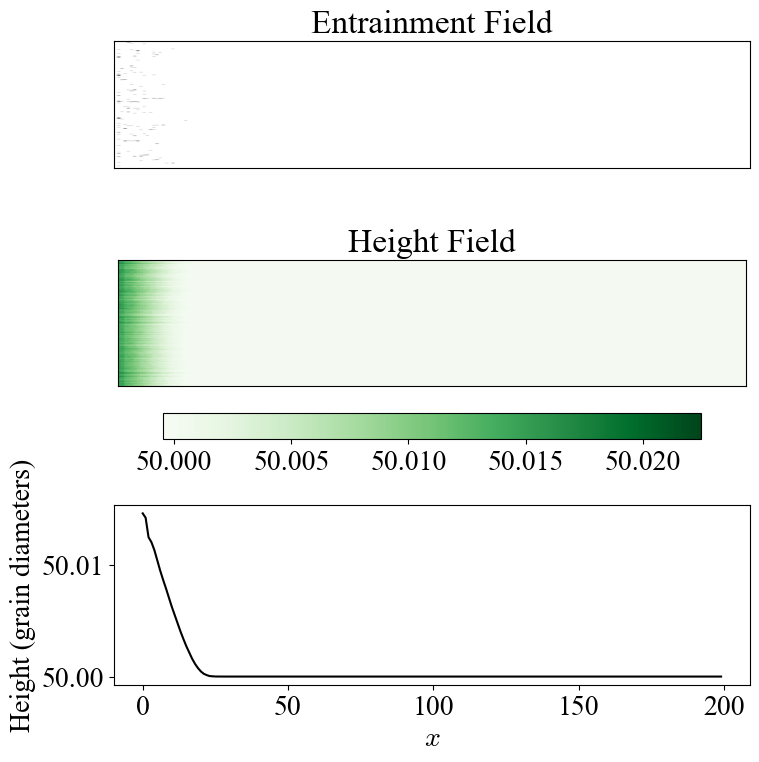

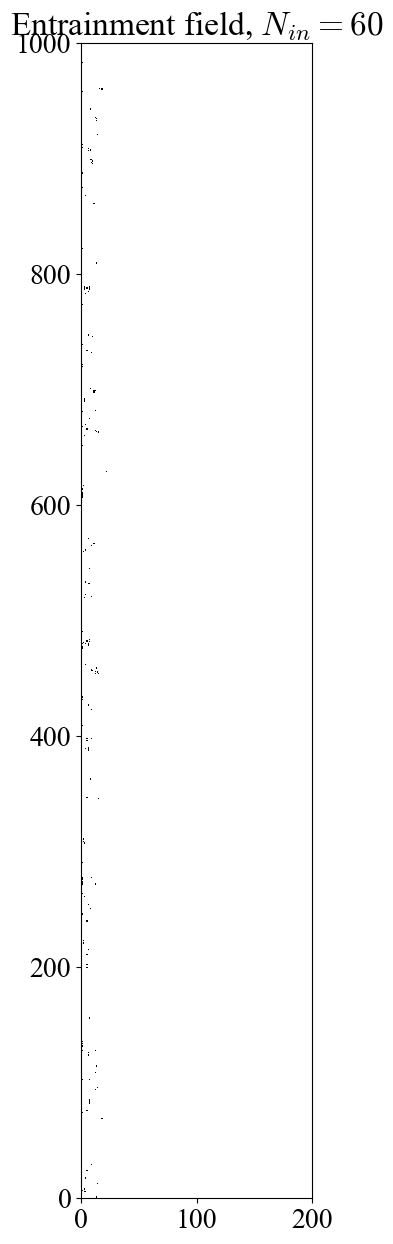

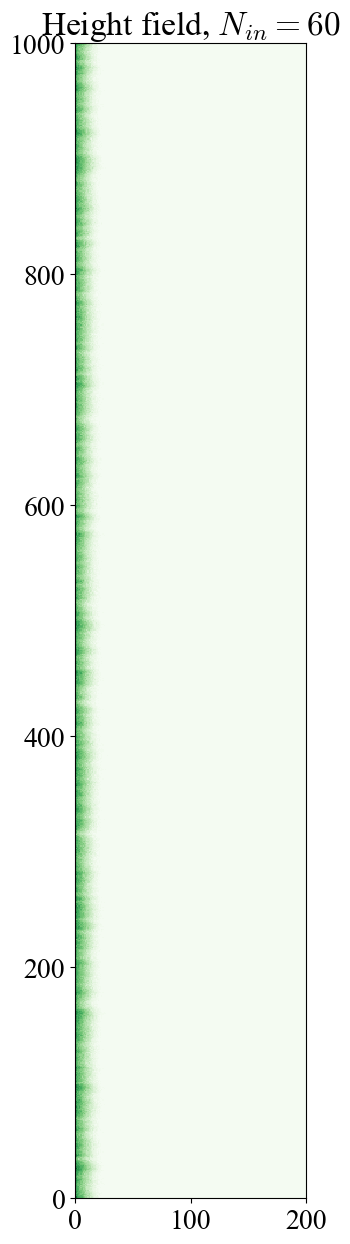

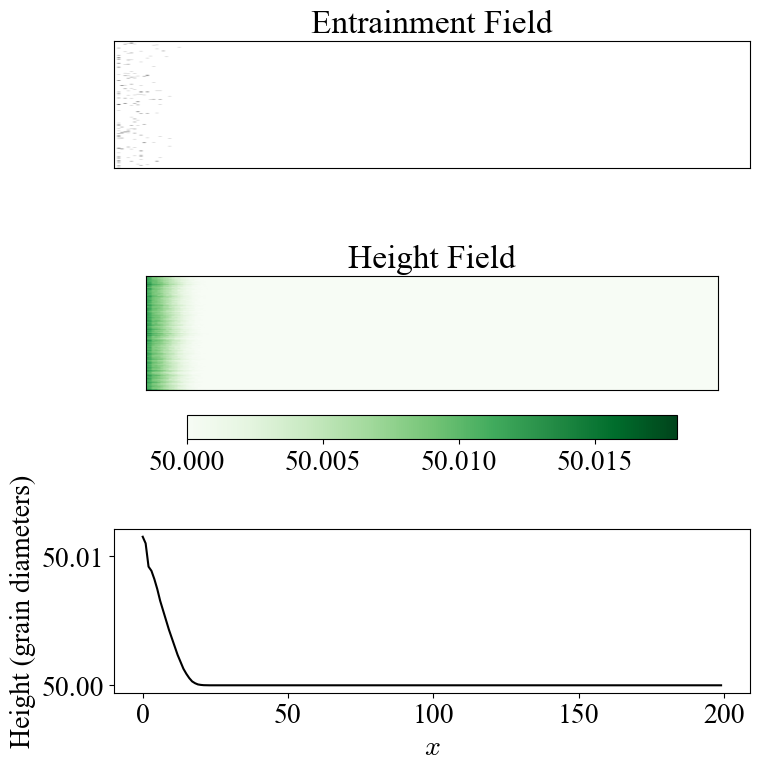

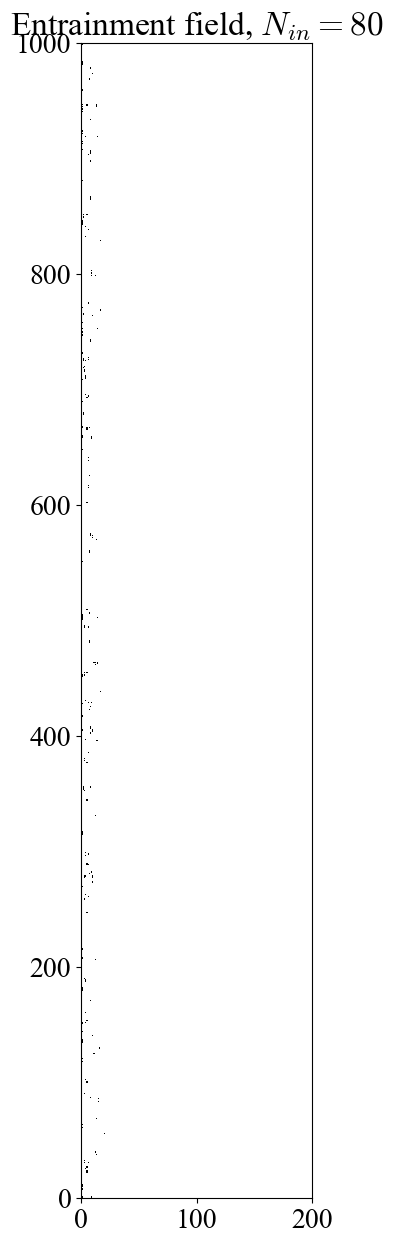

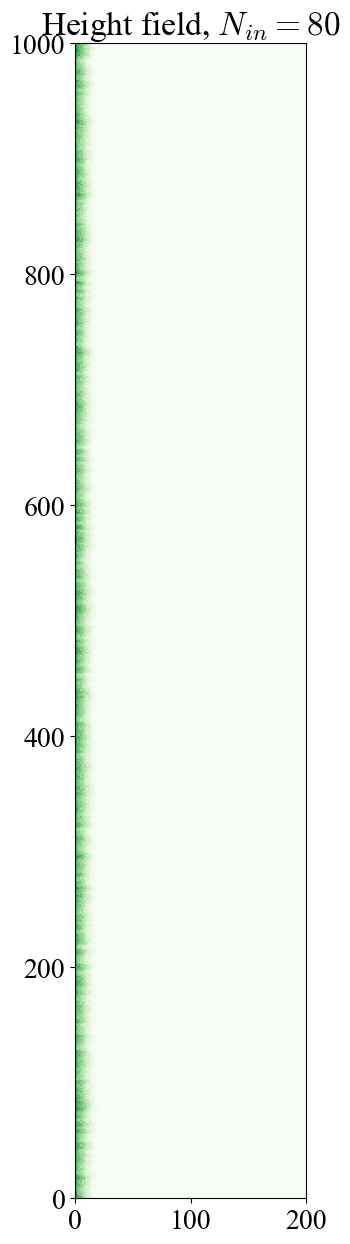

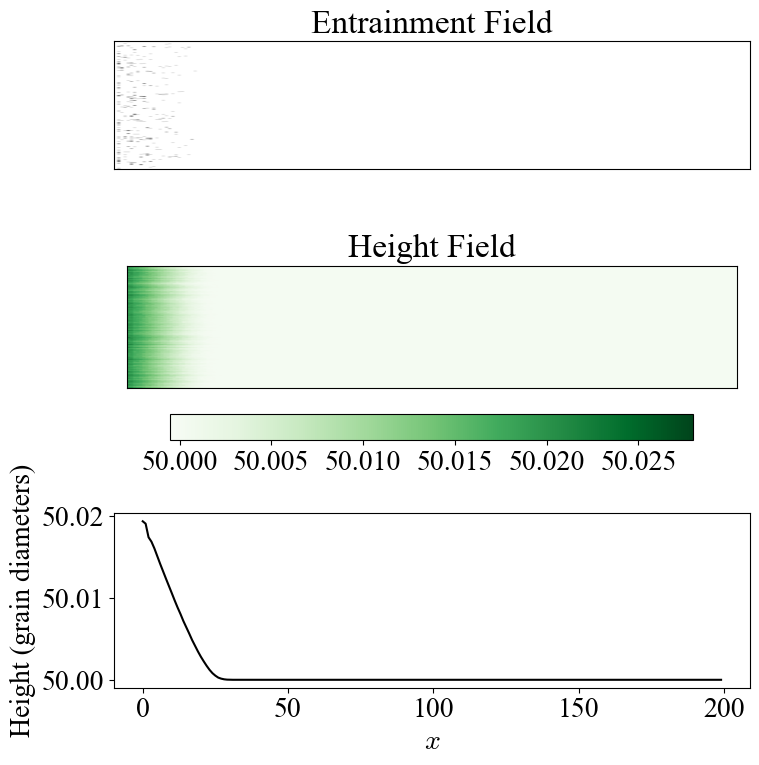

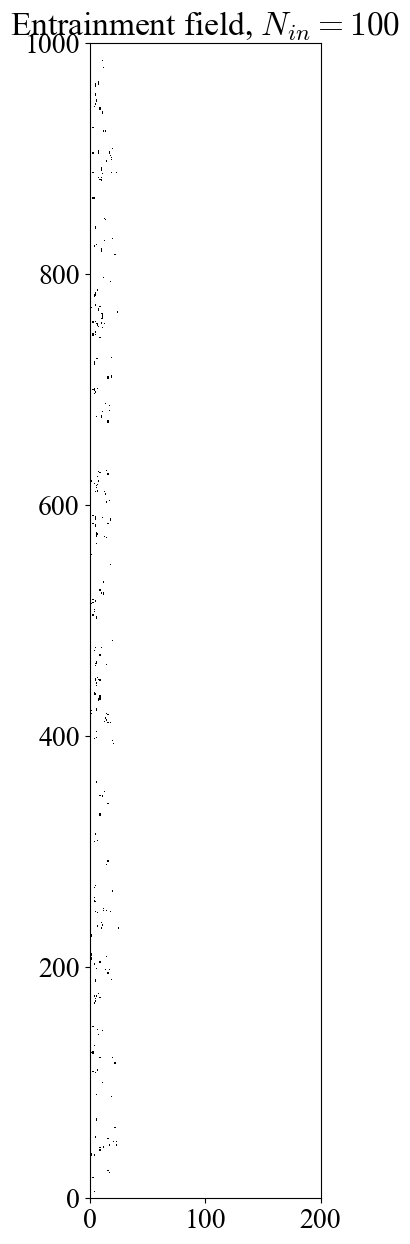

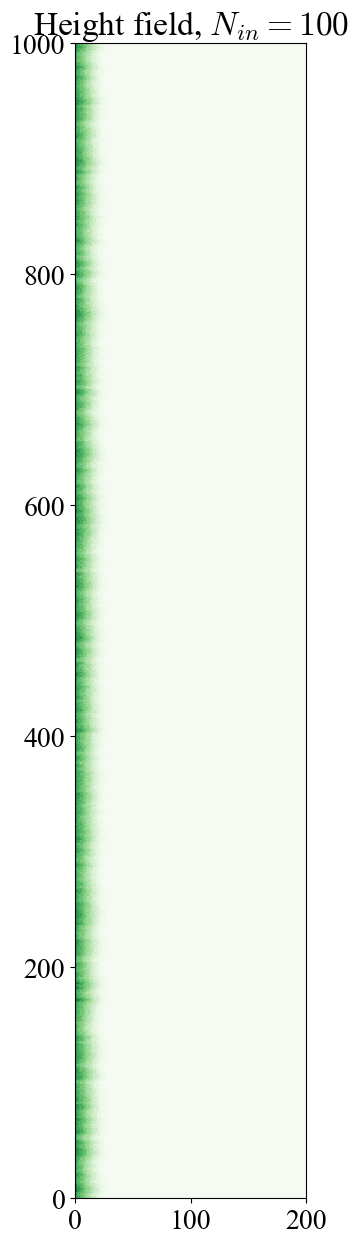

In [28]:
for ii,run in enumerate(runs[::2]):
    q_in=qins[ii]
    fname = str(glob.glob(idir+run+'/*_scalars.h5')[0])
    with h5py.File(fname,'r') as file:
        Nx = int(file['parameters']['Nx'][()])
        Ny = int(file['parameters']['Ny'][()])
        bed_h = file['parameters']['bed_h'][()]
        c_0 = file['parameters']['c_0'][()]
        f = file['parameters']['f'][()]
        fb = file['parameters']['fb'][()]
        initial = file['parameters']['initial'][()]
        mask_index = None
        q_in = file['parameters']['q_in'][()]
        skipmax = file['parameters']['skipmax'][()]
        slope = file['parameters']['slope'][()]
        zfactor = file['parameters']['zfactor'][()]

    # Initialize
    set_q = ez.set_q(Nx,Ny,c_0,f,q_in,skipmax=skipmax,initial=initial,slope=slope,zfactor=zfactor,bed_h = bed_h,mask_index=mask_index,fb=fb)

    # Load data:
    set_q.load_data(str(glob.glob(idir+run+'/*_state.h5')[0]),num = -1) # Loads the last save

    # Plot using model
    set_q.plot_min()

    # Plot by hand
    set_q.e = np.copy(set_q.ep) # Copy loaded state from ep, the auxiliary entrainment field.
    plt.figure(figsize=(3,3*(Ny/Nx)))
    plt.title('Entrainment field, $N_{in} = %i$' % q_in)
    plt.pcolor(set_q.e,cmap='binary')
    plt.gca().set_aspect(1)
    plt.show()

    plt.figure(figsize=(3,3*(Ny/Nx)))
    plt.title('Height field, $N_{in} = %i$' % q_in)
    plt.pcolor(set_q.z,vmin=np.min(set_q.z),vmax=np.max(set_q.z),
                        cmap=cm.Greens)
    plt.gca().set_aspect(1)
    plt.show()

# Time series

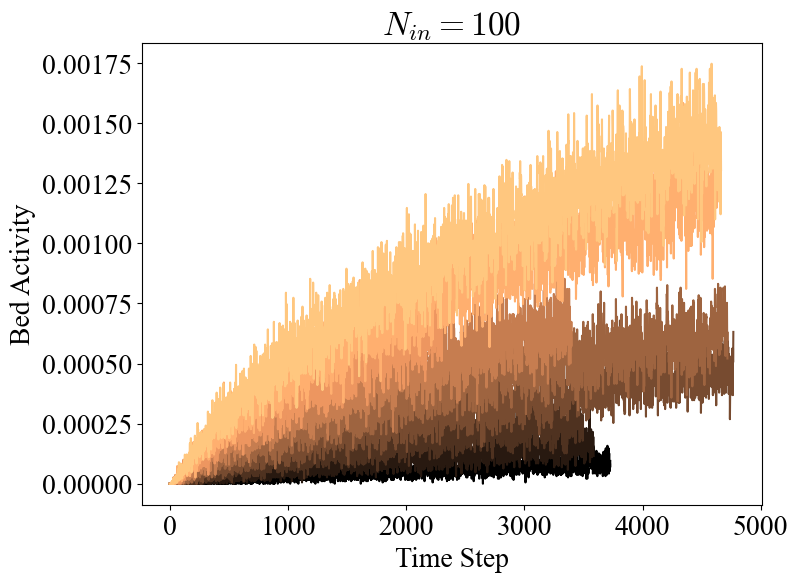

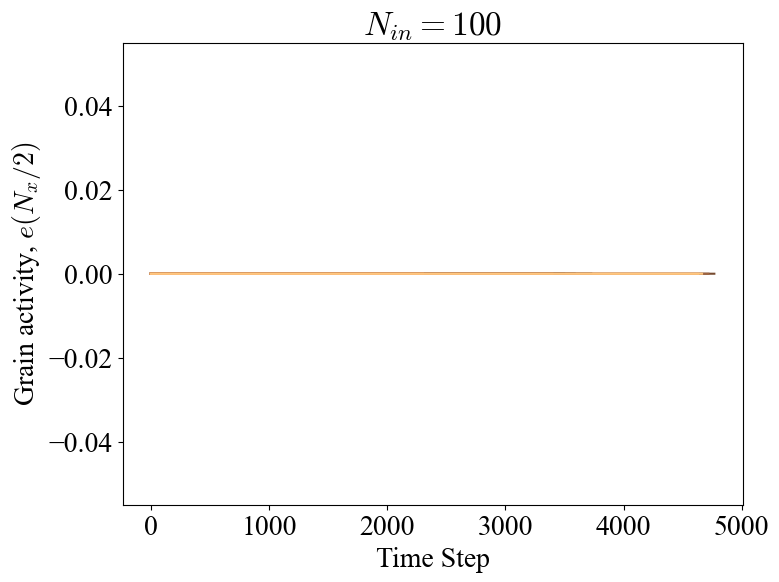

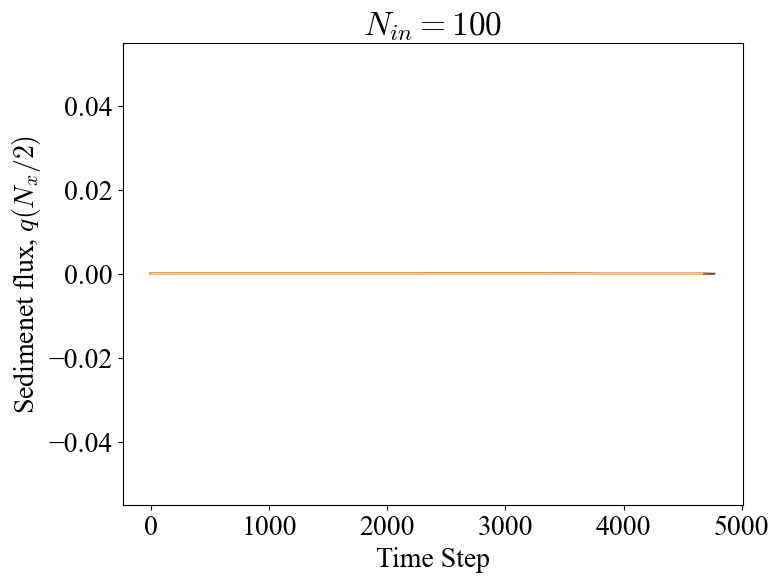

In [35]:
for ii,run in enumerate(runs):
    fname = str(glob.glob(idir+run+'/*_scalars.h5')[0])

    with h5py.File(fname,'r') as file:
        Nx = int(file['parameters']['Nx'][()])
        Ny = int(file['parameters']['Ny'][()])
        bed_h = file['parameters']['bed_h'][()]
        c_0 = file['parameters']['c_0'][()]
        f = file['parameters']['f'][()]
        fb = file['parameters']['fb'][()]
        initial = file['parameters']['initial'][()]
        mask_index = None
        q_in = file['parameters']['q_in'][()]
        skipmax = file['parameters']['skipmax'][()]
        slope = file['parameters']['slope'][()]
        zfactor = file['parameters']['zfactor'][()]

        # Get time-series [tstep, bed_activity,q_mid,e_mid,e_last,q_out]
        tstep = file['scalars']['tstep'][()]
        bed_activity = file['scalars']['bed_activity'][()] #NOTE: NOT grain activity.
        e_mid = file['scalars']['e_mid'][()] # Grain activity at x=Nx/2
        q_mid = file['scalars']['q_mid'][()] # Flux at x=Nx/2

    plt.figure(1,figsize=(8,6))
    plt.plot(tstep,bed_activity,c=cm.copper((q_in-20)/(100-20)))
    
    plt.figure(2,figsize=(8,6))
    plt.plot(tstep,e_mid,c=cm.copper((q_in-20)/(100-20)))
    
    plt.figure(3,figsize=(8,6))
    plt.plot(tstep,q_mid,c=cm.copper((q_in-20)/(100-20)))
    

plt.figure(1)
plt.title('$N_{in} = %i$' % q_in)
plt.xlabel('Time Step')
plt.ylabel(r"Bed Activity")

plt.figure(2)
plt.title('$N_{in} = %i$' % q_in)
plt.xlabel("Time Step")
plt.ylabel(r"Grain activity, $e(N_x/2)$")

plt.figure(3)
plt.title('$N_{in} = %i$' % q_in)
plt.xlabel("Time Step")
plt.ylabel(r"Sedimenet flux, $q(N_x/2)$")
plt.show()